In [1]:
#MiniSom
from minisom import MiniSom

In [2]:
import numpy as np 
import pandas as pd

In [4]:
df =pd.read_csv('C:\\Users\\cd246\\OneDrive\\Desktop\\JAMIA-PRAC\\AIMLPrac\\Datasets\\Pistachio_28_Features_Dataset.csv')
df.head()

,Area,Perimeter,Major_Axis,Minor_Axis,Eccentricity,Eqdiasq,Solidity,Convex_Area,Extent,Aspect_Ratio,Roundness,Compactness,Shapefactor_1,Shapefactor_2,Shapefactor_3,Shapefactor_4,Mean_RR,Mean_RG,Mean_RB,StdDev_RR,StdDev_RG,StdDev_RB,Skew_RR,Skew_RG,Skew_RB,Kurtosis_RR,Kurtosis_RG,Kurtosis_RB,Class
0,63391,1568.405,390.3396,236.7461,0.7951,284.0984,0.8665,73160,0.6394,1.6488,0.3238,0.7278,0.0062,0.0037,0.5297,0.8734,195.9932,180.2673,165.3167,17.7206,19.6024,21.1342,0.4581,0.6635,0.7591,2.9692,3.0576,2.9542,Kirmizi_Pistachio
1,68358,1942.187,410.8594,234.7525,0.8207,295.0188,0.8765,77991,0.6772,1.7502,0.2277,0.7181,0.0060,0.0034,0.5156,0.9024,222.5941,208.6210,187.3744,26.7061,27.2112,25.1035,-0.3847,-0.2713,-0.2927,1.9807,2.1006,2.2152,Kirmizi_Pistachio
2,73589,1246.538,452.3630,220.5547,0.8731,306.0987,0.9172,80234,0.7127,2.0510,0.5951,0.6767,0.0061,0.0030,0.4579,0.9391,213.3581,202.9122,187.7118,19.0129,20.0703,20.7006,-0.6014,-0.4500,0.2998,3.5420,3.6856,4.1012,Kirmizi_Pistachio
3,71106,1445.261,429.5291,216.0765,0.8643,300.8903,0.9589,74153,0.7028,1.9879,0.4278,0.7005,0.0060,0.0030,0.4907,0.9755,211.8630,205.4264,187.9537,18.1773,18.7152,29.7883,-0.6943,-0.6278,-0.7798,2.8776,2.8748,2.8953,Kirmizi_Pistachio
4,80087,1251.524,469.3783,220.9344,0.8823,319.3273,0.9657,82929,0.7459,2.1245,0.6425,0.6803,0.0059,0.0028,0.4628,0.9833,229.5648,217.5896,194.4906,23.4298,24.0878,23.1157,-0.9287,-0.8134,-0.4970,2.9915,2.8813,2.7362,Kirmizi_Pistachio


In [8]:
x =df.iloc[:,:-1]
y =df.iloc[:,-1]

In [10]:
x.head()

,Area,Perimeter,Major_Axis,Minor_Axis,Eccentricity,Eqdiasq,Solidity,Convex_Area,Extent,Aspect_Ratio,Roundness,Compactness,Shapefactor_1,Shapefactor_2,Shapefactor_3,Shapefactor_4,Mean_RR,Mean_RG,Mean_RB,StdDev_RR,StdDev_RG,StdDev_RB,Skew_RR,Skew_RG,Skew_RB,Kurtosis_RR,Kurtosis_RG,Kurtosis_RB
0,63391,1568.405,390.3396,236.7461,0.7951,284.0984,0.8665,73160,0.6394,1.6488,0.3238,0.7278,0.0062,0.0037,0.5297,0.8734,195.9932,180.2673,165.3167,17.7206,19.6024,21.1342,0.4581,0.6635,0.7591,2.9692,3.0576,2.9542
1,68358,1942.187,410.8594,234.7525,0.8207,295.0188,0.8765,77991,0.6772,1.7502,0.2277,0.7181,0.0060,0.0034,0.5156,0.9024,222.5941,208.6210,187.3744,26.7061,27.2112,25.1035,-0.3847,-0.2713,-0.2927,1.9807,2.1006,2.2152
2,73589,1246.538,452.3630,220.5547,0.8731,306.0987,0.9172,80234,0.7127,2.0510,0.5951,0.6767,0.0061,0.0030,0.4579,0.9391,213.3581,202.9122,187.7118,19.0129,20.0703,20.7006,-0.6014,-0.4500,0.2998,3.5420,3.6856,4.1012
3,71106,1445.261,429.5291,216.0765,0.8643,300.8903,0.9589,74153,0.7028,1.9879,0.4278,0.7005,0.0060,0.0030,0.4907,0.9755,211.8630,205.4264,187.9537,18.1773,18.7152,29.7883,-0.6943,-0.6278,-0.7798,2.8776,2.8748,2.8953
4,80087,1251.524,469.3783,220.9344,0.8823,319.3273,0.9657,82929,0.7459,2.1245,0.6425,0.6803,0.0059,0.0028,0.4628,0.9833,229.5648,217.5896,194.4906,23.4298,24.0878,23.1157,-0.9287,-0.8134,-0.4970,2.9915,2.8813,2.7362


In [11]:
y.head()

0    Kirmizi_Pistachio
1    Kirmizi_Pistachio
2    Kirmizi_Pistachio
3    Kirmizi_Pistachio
4    Kirmizi_Pistachio
Name: Class, dtype: object

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train ,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [20]:
from sklearn.preprocessing import LabelEncoder ,StandardScaler

In [ ]:
encoder =LabelEncoder()
scaler = StandardScaler()

In [44]:
y_train_enc=encoder.fit_transform(y_train.values.reshape(-1,1))

In [45]:
y_test_enc=encoder.fit_transform(y_test.values.reshape(-1,1))

In [25]:
X_train_scaled = scaler.fit_transform(X_train)

In [26]:
X_test_scaled = scaler.fit_transform(X_test)

In [28]:
X_train_transformed = pd.DataFrame(X_train_scaled,columns=x.columns)

In [29]:
X_test_transformed =pd.DataFrame(X_test_scaled,columns=x.columns)

In [30]:
som = MiniSom(
    x=20,y=20,input_len = 28,sigma=1.0,learning_rate=0.05
)

In [32]:
som.random_weights_init(X_train_scaled)

In [34]:
som.train_random(X_train_scaled,num_iteration=1000)

In [37]:
for x in X_test_scaled:
    o=som.winner(x)
    o = (int(o[0]), int(o[1]))
    print(f"BMU :{o}")

BMU :(13, 2)
BMU :(1, 14)
BMU :(2, 4)
BMU :(12, 4)
BMU :(5, 3)
BMU :(13, 16)
BMU :(7, 13)
BMU :(12, 6)
BMU :(10, 1)
BMU :(16, 4)
BMU :(4, 1)
BMU :(1, 4)
BMU :(6, 11)
BMU :(8, 2)
BMU :(5, 11)
BMU :(9, 9)
BMU :(1, 16)
BMU :(1, 16)
BMU :(13, 0)
BMU :(17, 13)
BMU :(18, 13)
BMU :(17, 1)
BMU :(12, 18)
BMU :(5, 16)
BMU :(2, 11)
BMU :(11, 19)
BMU :(15, 18)
BMU :(13, 2)
BMU :(8, 18)
BMU :(18, 14)
BMU :(3, 18)
BMU :(19, 19)
BMU :(10, 7)
BMU :(13, 0)
BMU :(14, 4)
BMU :(2, 7)
BMU :(16, 2)
BMU :(1, 5)
BMU :(2, 6)
BMU :(10, 18)
BMU :(6, 17)
BMU :(18, 12)
BMU :(12, 2)
BMU :(2, 3)
BMU :(4, 2)
BMU :(3, 19)
BMU :(16, 6)
BMU :(1, 17)
BMU :(14, 13)
BMU :(2, 10)
BMU :(16, 0)
BMU :(10, 17)
BMU :(14, 16)
BMU :(9, 9)
BMU :(14, 13)
BMU :(13, 7)
BMU :(4, 4)
BMU :(15, 11)
BMU :(2, 17)
BMU :(8, 13)
BMU :(2, 11)
BMU :(16, 9)
BMU :(9, 16)
BMU :(2, 8)
BMU :(12, 17)
BMU :(12, 13)
BMU :(2, 1)
BMU :(0, 16)
BMU :(0, 9)
BMU :(8, 13)
BMU :(6, 15)
BMU :(15, 17)
BMU :(4, 14)
BMU :(16, 1)
BMU :(12, 8)
BMU :(6, 15)
BMU :(5, 3

In [38]:
import matplotlib.pyplot as plt

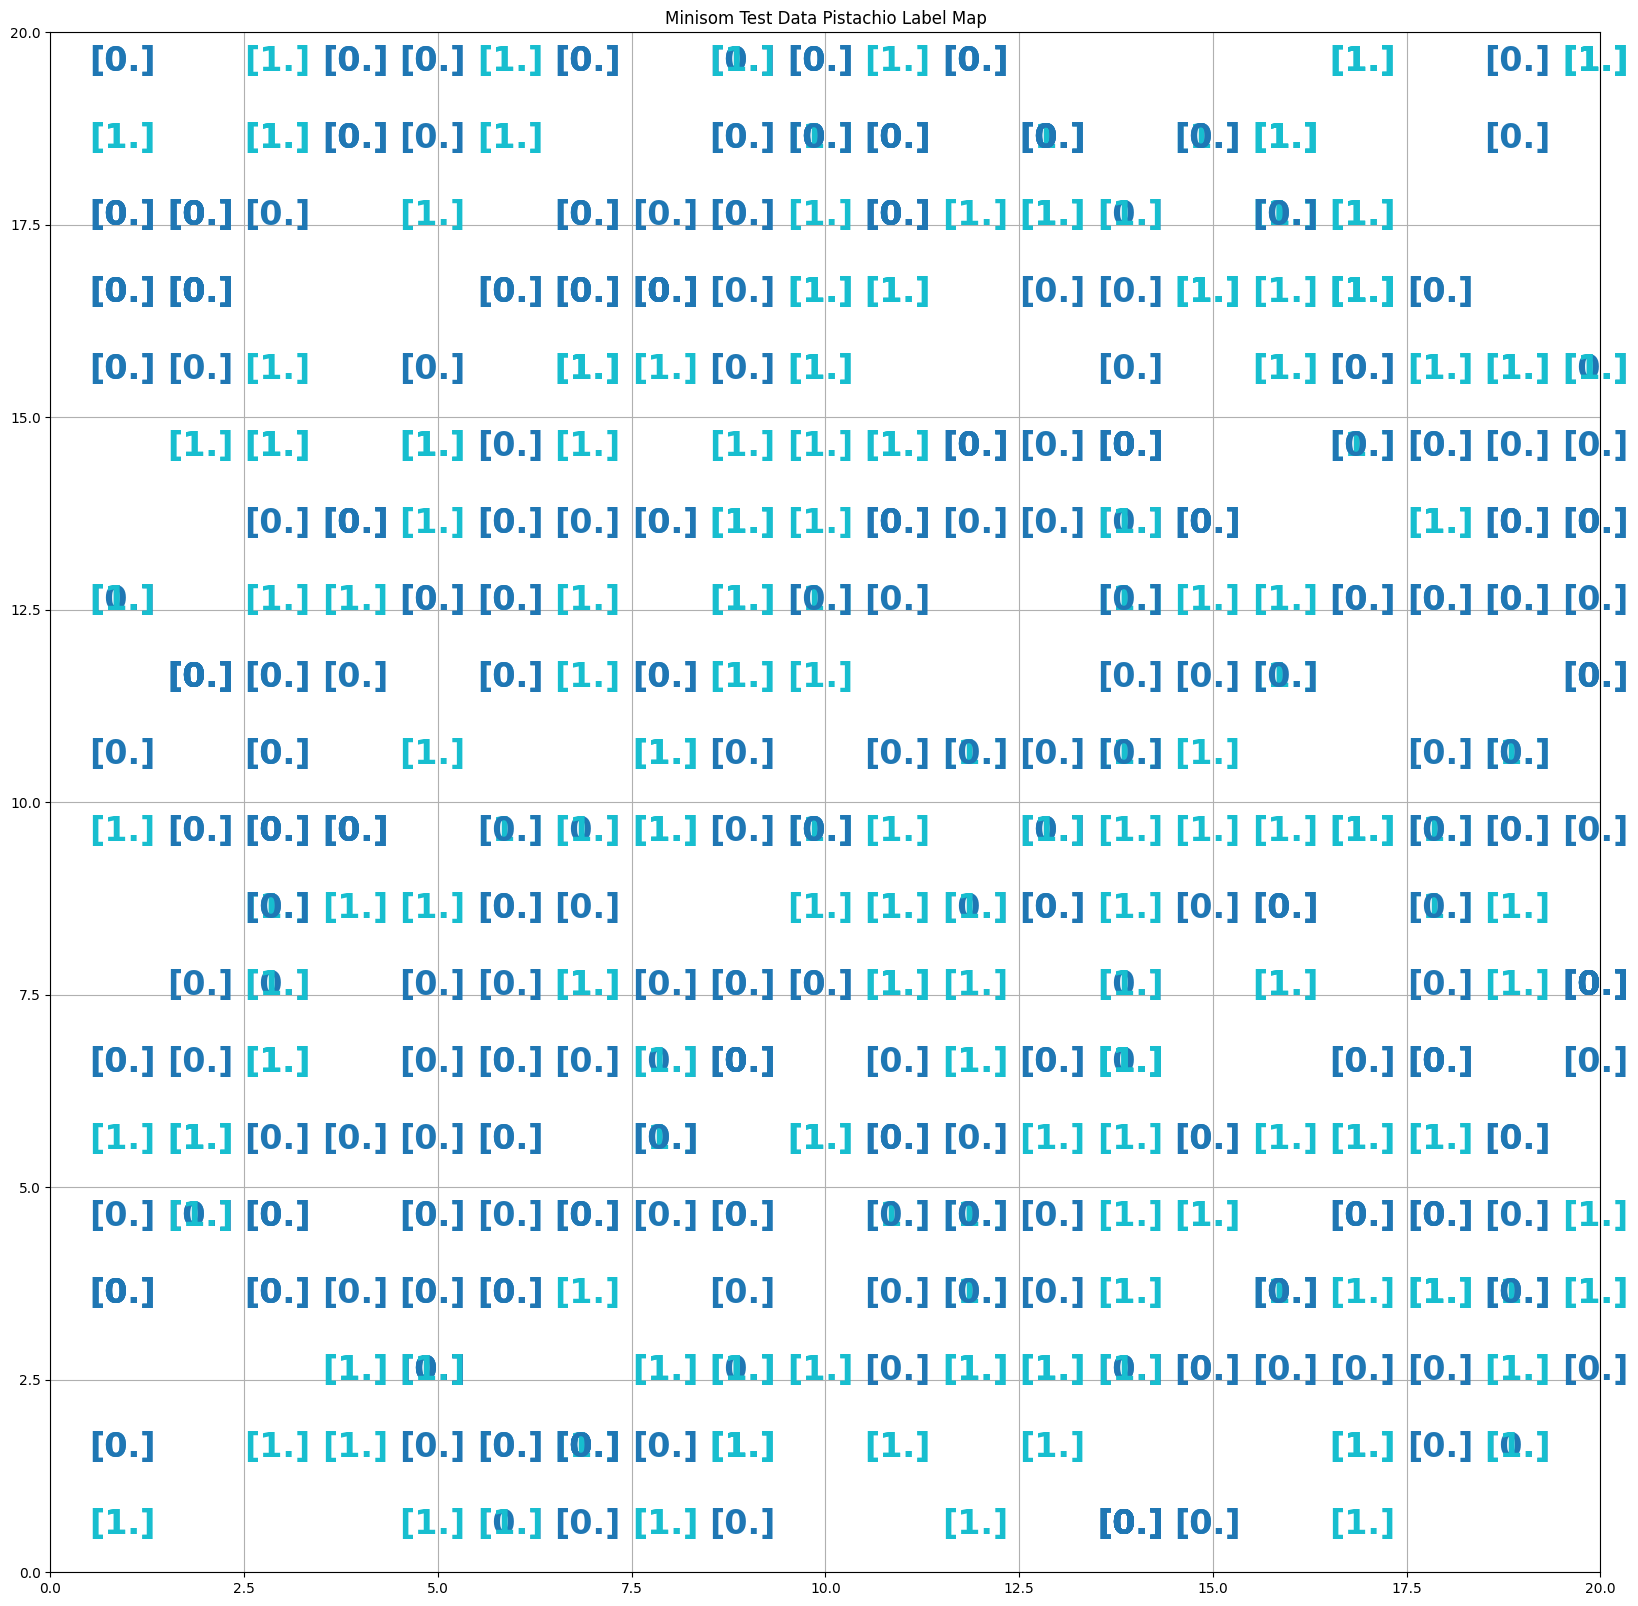

In [49]:
plt.figure(figsize=(20,20))
for i, x in enumerate(X_test_scaled):
    w = som.winner(x)
    plt.text(w[0]+0.5, w[1]+0.5,
             str(y_test_enc[i]),
             color=plt.cm.tab10((y_test_enc[i])),
             fontdict={'weight': 'bold', 'size': 24})
plt.xlim([0, 20])
plt.ylim([0, 20])
plt.title("Minisom Test Data Pistachio Label Map")    
plt.grid()
plt.show()